<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This Program Predicts EMployee Attriton rate


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#load data
from google.colab import files
uploaded=files.upload()

Saving Employee.csv to Employee (1).csv


In [51]:
df=pd.read_csv('Employee.csv')

In [52]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [53]:
df['STATUS'].value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [55]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [56]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
EmployeeID,1318,1318,1318,1318,1318,1318,1318,1318,1318,1318
recorddate_key,12/31/2006 0:00,12/31/2007 0:00,12/31/2008 0:00,12/31/2009 0:00,12/31/2010 0:00,12/31/2011 0:00,12/31/2012 0:00,12/31/2013 0:00,12/31/2014 0:00,12/31/2015 0:00
birthdate_key,1/3/1954,1/3/1954,1/3/1954,1/3/1954,1/3/1954,1/3/1954,1/3/1954,1/3/1954,1/3/1954,1/3/1954
orighiredate_key,8/28/1989,8/28/1989,8/28/1989,8/28/1989,8/28/1989,8/28/1989,8/28/1989,8/28/1989,8/28/1989,8/28/1989
terminationdate_key,1/1/1900,1/1/1900,1/1/1900,1/1/1900,1/1/1900,1/1/1900,1/1/1900,1/1/1900,1/1/1900,1/1/1900
age,52,53,54,55,56,57,58,59,60,61
length_of_service,17,18,19,20,21,22,23,24,25,26
city_name,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver
department_name,Executive,Executive,Executive,Executive,Executive,Executive,Executive,Executive,Executive,Executive
job_title,CEO,CEO,CEO,CEO,CEO,CEO,CEO,CEO,CEO,CEO


In [57]:
df.duplicated().sum()

0

In [58]:
df.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

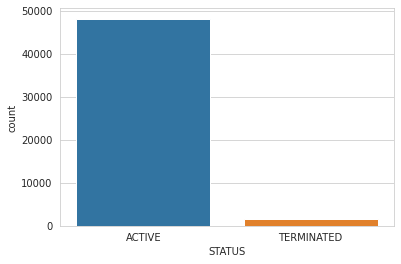

In [59]:
sns.set_style('whitegrid')
sns.countplot(df['STATUS'])

In [60]:
df['STATUS'].unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [61]:
df.drop(['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','gender_full','terminationdate_key'],axis=1,inplace=True)

In [62]:


df

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES


In [63]:

df.tail()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,20,1,Grand Forks,Customer Service,Cashier,13,F,Layoff,Involuntary,2014,TERMINATED,STORES


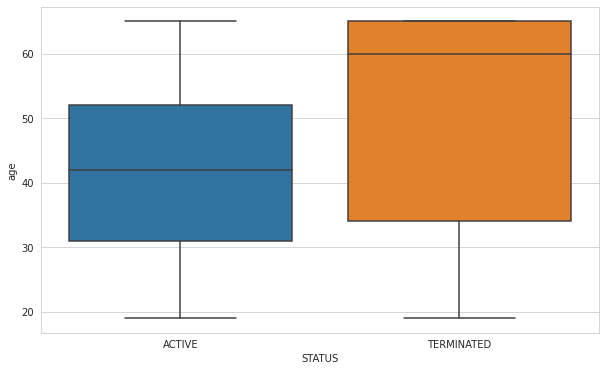

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(x = 'STATUS', y='age', data = df)

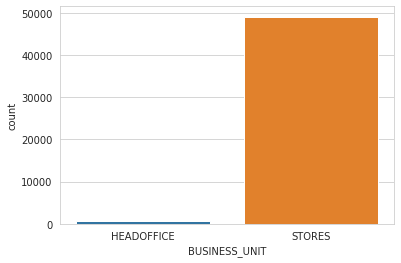

In [65]:
sns.set_style('whitegrid')
sns.countplot(df['BUSINESS_UNIT'])

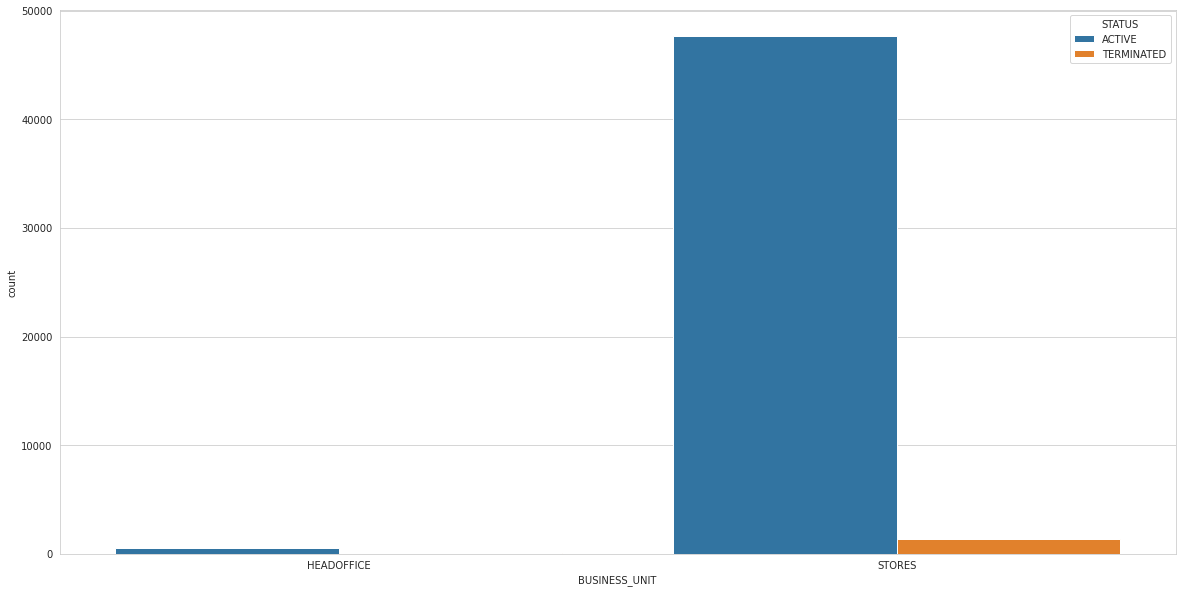

In [66]:
plt.subplots(figsize=(20,10))
sns.countplot(hue= 'STATUS', data = df, x = 'BUSINESS_UNIT')

In [67]:
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Accounts Receiveable Clerk           30
Labor Relations Analyst              30
Trainer                              26
Accounts Payable Clerk               25
Compensation Analyst                 20
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Corporate Lawyer                     17


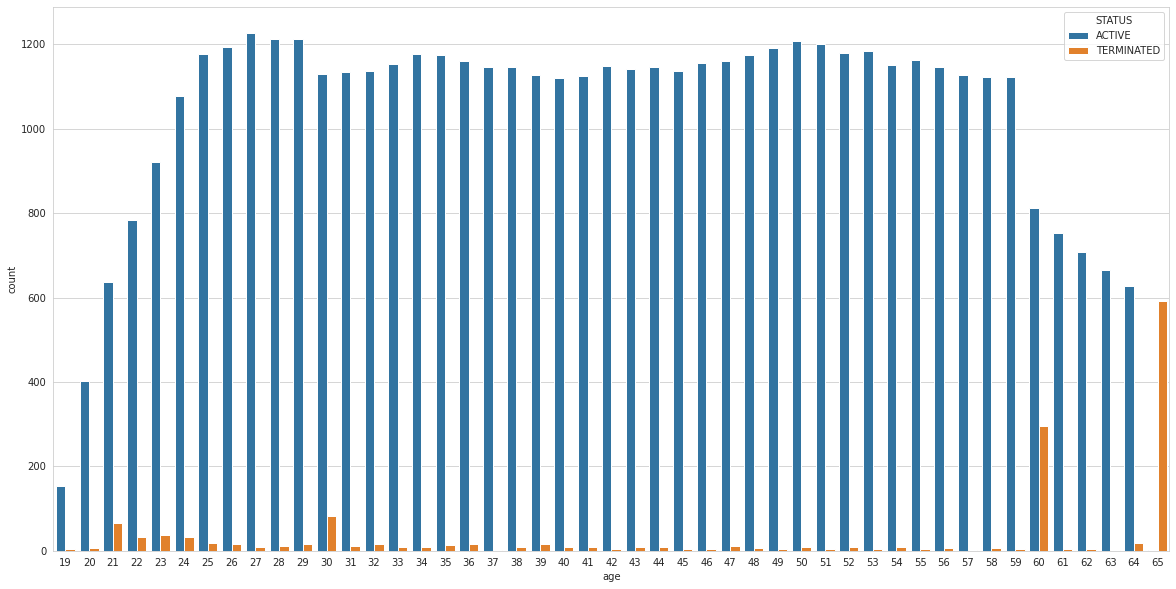

In [68]:
plt.subplots(figsize=(20,10))
sns.countplot(x= 'age',hue = 'STATUS',data = df)

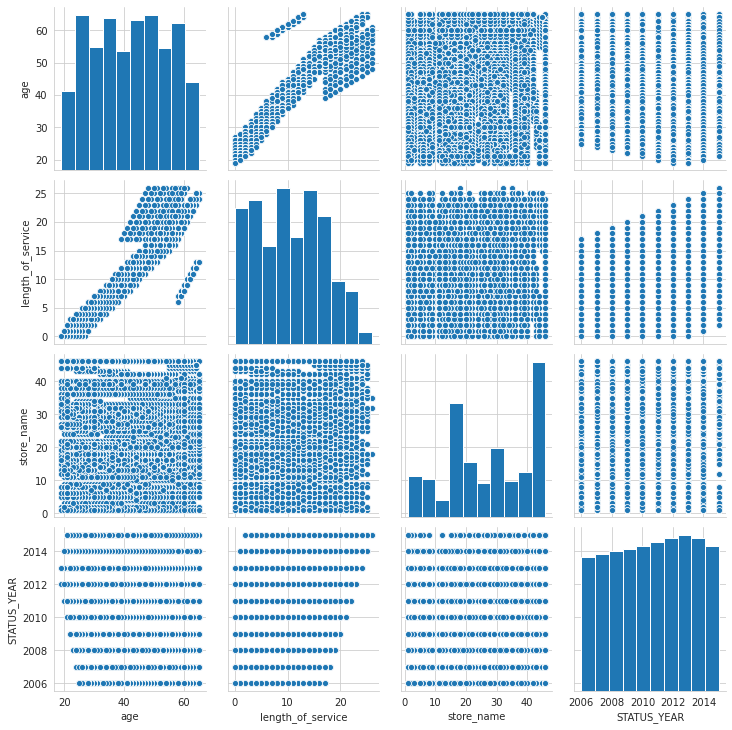

In [69]:

sns.pairplot(df)

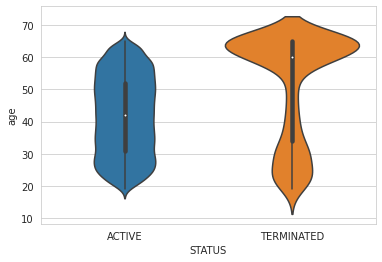

In [70]:
sns.violinplot(x="STATUS", y="age", data=df)

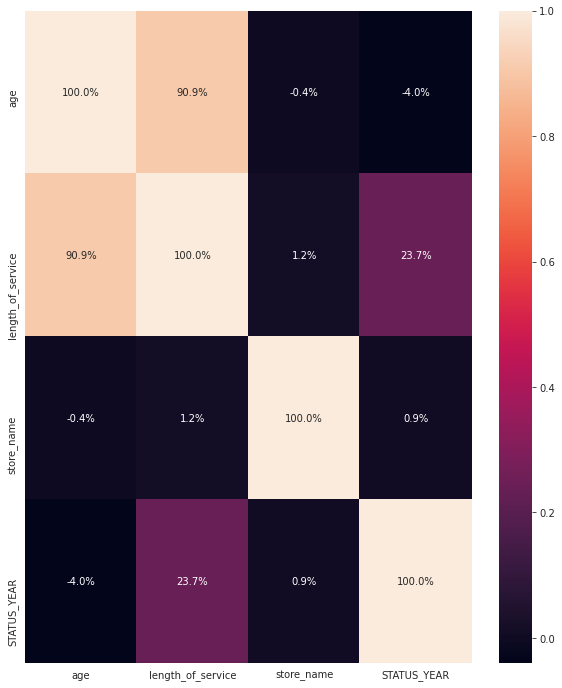

In [71]:
plt.figure(figsize=(10,12))   
sns.heatmap(df.corr(),annot=True,fmt='.1%')

In [72]:
df.columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'termreason_desc', 'termtype_desc',
       'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

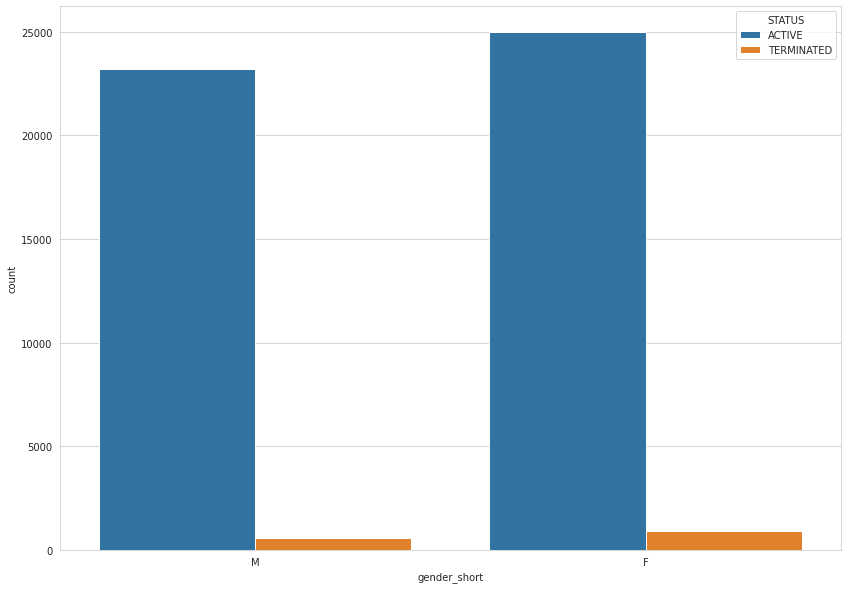

In [73]:
plt.subplots(figsize=(14,10))
sns.countplot(x= 'gender_short',hue = 'STATUS',data = df)

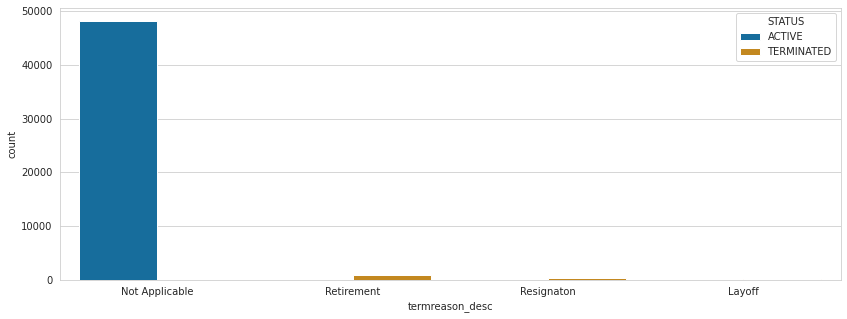

In [74]:

plt.subplots(figsize=(14,5))
sns.countplot(x= 'termreason_desc',hue = 'STATUS',data = df,palette='colorblind')

In [75]:

df

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES


In [76]:
df.columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'termreason_desc', 'termtype_desc',
       'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [77]:
#SEGREGRATE JOB TITLES


employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, 'out of 47')

Total jobs categorised: 47 out of 47


In [78]:
#FEATURE ADDING
df['Hierarchy'] = df.job_title
df['Hierarchy'] = df['Hierarchy'].replace(employee, 0)
df['Hierarchy'] = df['Hierarchy'].replace(manager, 1)
df['Hierarchy'] = df['Hierarchy'].replace(executive, 2)
df['Hierarchy'] = df['Hierarchy'].replace(board, 3)
df['Hierarchy'].value_counts()

0    47739
1     1749
3      105
2       60
Name: Hierarchy, dtype: int64

In [79]:
df.shape

(49653, 13)

In [80]:
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Accounts Receiveable Clerk           30
Labor Relations Analyst              30
Trainer                              26
Accounts Payable Clerk               25
Compensation Analyst                 20
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Corporate Lawyer                     17


In [81]:
#NOW SEGREGRATING DEPARTMENTS
df['department_name'].value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Investment                   24
Compensation                 24
Audit                        24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [82]:
serve_cus = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

serve_biz = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']
total = len(serve_cus) + len(serve_biz)
print('Total departments categorised:', total, 'out of 21')

Total departments categorised: 21 out of 21


In [83]:
df['Service_to'] = df.department_name
df['Service_to'] = df['Service_to'].replace(serve_cus, 'Customer')
df['Service_to'] = df['Service_to'].replace(serve_biz, 'Business')

df['Service_to'].value_counts()

Customer    48797
Business      856
Name: Service_to, dtype: int64

In [84]:
df

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Hierarchy,Service_to
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,2,Business
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,2,Business
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,2,Business
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,2,Business
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,2,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,TERMINATED,STORES,0,Customer
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES,0,Customer
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,TERMINATED,STORES,0,Customer
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES,0,Customer


In [85]:
df['city_name'].value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

In [86]:
 city_pop_2011 = {'Vancouver':2313328,
                 'Victoria':344615,
                 'Nanaimo':146574,
                 'New Westminster':65976,
                 'Kelowna':179839,
                 'Burnaby':223218,
                 'Kamloops':85678,
                 'Prince George':71974,
                 'Cranbrook':19319,
                 'Surrey':468251,
                 'Richmond':190473,
                 'Terrace':11486,
                 'Chilliwack':77936,
                 'Trail':7681,
                 'Langley':25081,
                 'Vernon':38180,
                 'Squamish':17479,
                 'Quesnel':10007,
                 'Abbotsford':133497,
                 'North Vancouver':48196,
                 'Fort St John':18609,
                  'Williams Lake':10832,
                 'West Vancouver':42694,
                 'Port Coquitlam':55985,
                 'Aldergrove':12083,
                 'Fort Nelson':3561,
                 'Nelson':10230,
                 'New Westminister':65976,
                 'Grand Forks':3985,
                 'White Rock':19339,
                 'Haney':76052,
                 'Princeton':2724,
                 'Dawson Creek':11583,
                 'Bella Bella':1095,
                 'Ocean Falls':129,
                 'Pitt Meadows':17736,
                 'Cortes Island':1007,
                 'Valemount':1020,
                 'Dease Lake':58,
                 'Blue River':215}

print('Cities in dictionary:', len(city_pop_2011), 'out of 40')

Cities in dictionary: 40 out of 40


In [87]:
df['Pop'] = df['city_name']
df['Pop'] = df['Pop'].map(city_pop_2011)


df['Pop_category'] = df['Pop']

city_ix = (df['Pop'] >= 100000)

rural_ix = ((df['Pop'] < 100000) & (df['Pop'] >= 10000))

remote_ix = (df['Pop'] < 10000)

df.loc[city_ix, 'Pop_category'] = 'City'
df.loc[rural_ix, 'Pop_category'] = 'Rural'
df.loc[remote_ix, 'Pop_category'] = 'Remote'


df.Pop_category.value_counts()

City      28194
Rural     19542
Remote     1917
Name: Pop_category, dtype: int64

In [88]:
df['Pop']

0        2313328
1        2313328
2        2313328
3        2313328
4        2313328
          ...   
49648       1020
49649    2313328
49650      19339
49651     179839
49652       3985
Name: Pop, Length: 49653, dtype: int64

In [89]:
city_pop_2011

{'Abbotsford': 133497,
 'Aldergrove': 12083,
 'Bella Bella': 1095,
 'Blue River': 215,
 'Burnaby': 223218,
 'Chilliwack': 77936,
 'Cortes Island': 1007,
 'Cranbrook': 19319,
 'Dawson Creek': 11583,
 'Dease Lake': 58,
 'Fort Nelson': 3561,
 'Fort St John': 18609,
 'Grand Forks': 3985,
 'Haney': 76052,
 'Kamloops': 85678,
 'Kelowna': 179839,
 'Langley': 25081,
 'Nanaimo': 146574,
 'Nelson': 10230,
 'New Westminister': 65976,
 'New Westminster': 65976,
 'North Vancouver': 48196,
 'Ocean Falls': 129,
 'Pitt Meadows': 17736,
 'Port Coquitlam': 55985,
 'Prince George': 71974,
 'Princeton': 2724,
 'Quesnel': 10007,
 'Richmond': 190473,
 'Squamish': 17479,
 'Surrey': 468251,
 'Terrace': 11486,
 'Trail': 7681,
 'Valemount': 1020,
 'Vancouver': 2313328,
 'Vernon': 38180,
 'Victoria': 344615,
 'West Vancouver': 42694,
 'White Rock': 19339,
 'Williams Lake': 10832}

In [90]:
df['Pop_category']

0          City
1          City
2          City
3          City
4          City
          ...  
49648    Remote
49649      City
49650     Rural
49651      City
49652    Remote
Name: Pop_category, Length: 49653, dtype: object

In [91]:
city_ix

0         True
1         True
2         True
3         True
4         True
         ...  
49648    False
49649     True
49650    False
49651     True
49652    False
Name: Pop, Length: 49653, dtype: bool

In [92]:
rural_ix

0        False
1        False
2        False
3        False
4        False
         ...  
49648    False
49649    False
49650     True
49651    False
49652    False
Name: Pop, Length: 49653, dtype: bool

In [93]:
df.loc[city_ix, 'Pop_category']

0        City
1        City
2        City
3        City
4        City
         ... 
49641    City
49643    City
49646    City
49649    City
49651    City
Name: Pop_category, Length: 28194, dtype: object

In [94]:
df.dtypes

age                   int64
length_of_service     int64
city_name            object
department_name      object
job_title            object
store_name            int64
gender_short         object
termreason_desc      object
termtype_desc        object
STATUS_YEAR           int64
STATUS               object
BUSINESS_UNIT        object
Hierarchy             int64
Service_to           object
Pop                   int64
Pop_category         object
dtype: object

In [95]:
df['Pop_category'] = df['Pop_category'].replace('Remote', 0)
df['Pop_category'] = df['Pop_category'].replace('Rural', 1)
df['Pop_category'] = df['Pop_category'].replace('City', 2)

df['Pop_category'].value_counts()

2    28194
1    19542
0     1917
Name: Pop_category, dtype: int64

In [96]:
 df.dtypes

age                   int64
length_of_service     int64
city_name            object
department_name      object
job_title            object
store_name            int64
gender_short         object
termreason_desc      object
termtype_desc        object
STATUS_YEAR           int64
STATUS               object
BUSINESS_UNIT        object
Hierarchy             int64
Service_to           object
Pop                   int64
Pop_category          int64
dtype: object

In [97]:
df['STATUS'] = df['STATUS'].map({'ACTIVE':1, 'TERMINATED':0})

In [99]:
df.dtypes

age                   int64
length_of_service     int64
city_name            object
department_name      object
job_title            object
store_name            int64
gender_short         object
termreason_desc      object
termtype_desc        object
STATUS_YEAR           int64
STATUS                int64
BUSINESS_UNIT        object
Hierarchy             int64
Service_to           object
Pop                   int64
Pop_category          int64
dtype: object

In [100]:
out_of_co = df[df.STATUS == 0]
in_co = df[df.STATUS == 1]

In [102]:
len(out_of_co),len(in_co)

(1485, 48168)

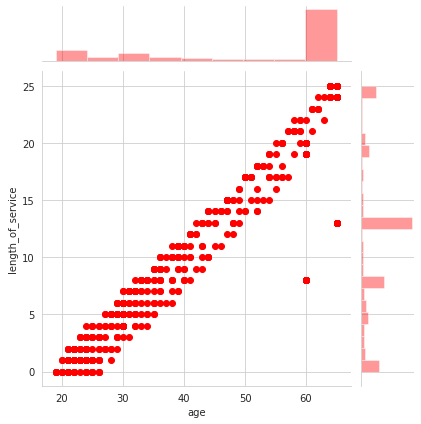

In [103]:
sns.jointplot(out_of_co.age, out_of_co.length_of_service, color='r')

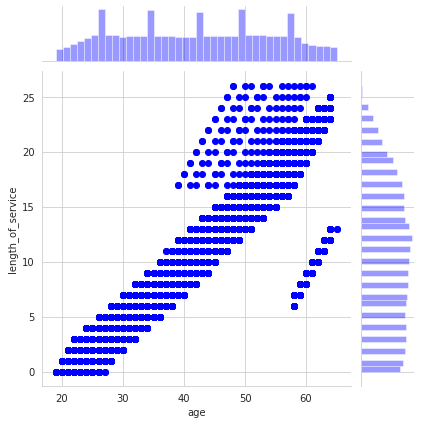

In [105]:
sns.jointplot(in_co.age, in_co.length_of_service, color='b')

In [106]:
df

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,Hierarchy,Service_to,Pop,Pop_category
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,1,HEADOFFICE,2,Business,2313328,2
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,1,HEADOFFICE,2,Business,2313328,2
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,1,HEADOFFICE,2,Business,2313328,2
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,1,HEADOFFICE,2,Business,2313328,2
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,1,HEADOFFICE,2,Business,2313328,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,Valemount,Dairy,Dairy Person,34,M,Layoff,Involuntary,2015,0,STORES,0,Customer,1020,0
49649,19,0,Vancouver,Customer Service,Cashier,44,F,Resignaton,Voluntary,2013,0,STORES,0,Customer,2313328,2
49650,21,2,White Rock,Customer Service,Cashier,39,F,Layoff,Involuntary,2015,0,STORES,0,Customer,19339,1
49651,19,0,Kelowna,Customer Service,Cashier,16,F,Resignaton,Voluntary,2013,0,STORES,0,Customer,179839,2


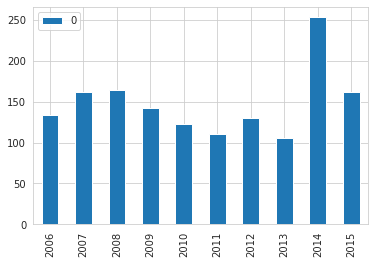

In [112]:
from collections import Counter

term_per_year = Counter(out_of_co.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

In [113]:
term_per_year

Counter({2006: 134,
         2007: 162,
         2008: 164,
         2009: 142,
         2010: 123,
         2011: 110,
         2012: 130,
         2013: 105,
         2014: 253,
         2015: 162})

In [116]:
term_per_year_in=Counter(in_co.STATUS_YEAR)

In [117]:
df.dtypes

age                   int64
length_of_service     int64
city_name            object
department_name      object
job_title            object
store_name            int64
gender_short         object
termreason_desc      object
termtype_desc        object
STATUS_YEAR           int64
STATUS                int64
BUSINESS_UNIT        object
Hierarchy             int64
Service_to           object
Pop                   int64
Pop_category          int64
dtype: object

In [118]:
drop_cols = [ 'termreason_desc','termtype_desc', 'STATUS_YEAR', 'store_name', 'job_title', 'department_name',
             'city_name', 'Pop']

df = df.drop(drop_cols, axis=1)

In [119]:
df

,age,length_of_service,gender_short,STATUS,BUSINESS_UNIT,Hierarchy,Service_to,Pop_category
0,52,17,M,1,HEADOFFICE,2,Business,2
1,53,18,M,1,HEADOFFICE,2,Business,2
2,54,19,M,1,HEADOFFICE,2,Business,2
3,55,20,M,1,HEADOFFICE,2,Business,2
4,56,21,M,1,HEADOFFICE,2,Business,2
...,...,...,...,...,...,...,...,...
49648,21,2,M,0,STORES,0,Customer,0
49649,19,0,F,0,STORES,0,Customer,2
49650,21,2,F,0,STORES,0,Customer,1
49651,19,0,F,0,STORES,0,Customer,2


In [120]:
# The gender, business unit and Service_to categories are nominal, so they will
# be exploded instead of being converted to ordinal values
dummy_cols = ['gender_short', 'BUSINESS_UNIT', 'Service_to']
df = pd.get_dummies(df, columns=dummy_cols)

In [121]:
df

,age,length_of_service,STATUS,Hierarchy,Pop_category,gender_short_F,gender_short_M,BUSINESS_UNIT_HEADOFFICE,BUSINESS_UNIT_STORES,Service_to_Business,Service_to_Customer
0,52,17,1,2,2,0,1,1,0,1,0
1,53,18,1,2,2,0,1,1,0,1,0
2,54,19,1,2,2,0,1,1,0,1,0
3,55,20,1,2,2,0,1,1,0,1,0
4,56,21,1,2,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,0,0,0,0,1,0,1,0,1
49649,19,0,0,0,2,1,0,0,1,0,1
49650,21,2,0,0,1,1,0,0,1,0,1
49651,19,0,0,0,2,1,0,0,1,0,1


In [122]:
label = df.STATUS
df = df.drop('STATUS', axis=1)

In [123]:
df

,age,length_of_service,Hierarchy,Pop_category,gender_short_F,gender_short_M,BUSINESS_UNIT_HEADOFFICE,BUSINESS_UNIT_STORES,Service_to_Business,Service_to_Customer
0,52,17,2,2,0,1,1,0,1,0
1,53,18,2,2,0,1,1,0,1,0
2,54,19,2,2,0,1,1,0,1,0
3,55,20,2,2,0,1,1,0,1,0
4,56,21,2,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
49648,21,2,0,0,0,1,0,1,0,1
49649,19,0,0,2,1,0,0,1,0,1
49650,21,2,0,1,1,0,0,1,0,1
49651,19,0,0,2,1,0,0,1,0,1


In [124]:
label

0        1
1        1
2        1
3        1
4        1
        ..
49648    0
49649    0
49650    0
49651    0
49652    0
Name: STATUS, Length: 49653, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,
                                                    random_state=10)

In [127]:
X_train

,age,length_of_service,Hierarchy,Pop_category,gender_short_F,gender_short_M,BUSINESS_UNIT_HEADOFFICE,BUSINESS_UNIT_STORES,Service_to_Business,Service_to_Customer
48893,65,13,0,2,1,0,0,1,0,1
34169,32,6,0,1,0,1,0,1,0,1
18342,49,15,0,2,1,0,0,1,0,1
3346,61,22,0,2,1,0,0,1,0,1
46913,22,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
40059,25,1,0,1,1,0,0,1,0,1
28017,34,4,0,1,0,1,0,1,0,1
29199,33,4,0,1,0,1,0,1,0,1
40061,27,3,0,1,1,0,0,1,0,1


In [128]:
X_test

,age,length_of_service,Hierarchy,Pop_category,gender_short_F,gender_short_M,BUSINESS_UNIT_HEADOFFICE,BUSINESS_UNIT_STORES,Service_to_Business,Service_to_Customer
1066,64,24,1,1,1,0,0,1,0,1
18449,51,17,0,1,1,0,0,1,0,1
10572,54,18,0,2,1,0,0,1,0,1
887,62,22,1,1,1,0,0,1,0,1
18788,49,16,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
29355,39,10,0,2,1,0,0,1,0,1
35575,30,4,0,2,1,0,0,1,0,1
32630,33,5,0,1,1,0,0,1,0,1
7939,56,19,0,2,0,1,0,1,0,1


In [132]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('KNN model score is %0.10f  ' %score)

KNN model score is 0.9869092374  


In [133]:
# SVC
model = SVC(C=1, kernel='rbf', random_state=10)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('SVC model score is %0.4f' %score)

SVC model score is 0.9704


In [135]:
# SVC
model = SVC(C=1, kernel='linear', random_state=1)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('SVC model score is %0.4f' %score)

SVC model score is 0.9704


In [136]:
# Random Forest
model = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2,
                               oob_score=False, random_state=10)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('Random Forest model score is %0.4f' %score)

Random Forest model score is 0.9865
